# HR Analysis

Dataset: HR Analysis

Aim: Choosing the best classification model to predict why are best and most experienced employees leaving the company?

Output varible: Left (1-Left the Company, 0 - Not Left the Company)

Input Variables: satisfaction_level, last_evaluation, number_project, average_montly_hours,	time_spend_company,	Work_accident, left, promotion_last_5years, sales, salary


In [2]:
import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


# Read Data

In [12]:
data = pd.read_csv('HR_comma_sep.csv')
data.head() # to display top 5 rows

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Take a brief look at HR data
3 continuous variables (satisfaction level, last evaluation, average monthly hours)

2 string-value variables (sales, salary).

# Missing data?
Checking if data is missing

Convert string-value variables to numeric-value categorical variables

Because this is a classification problem, it is better to convert continuous variables to categorical ones.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Next, because most models are not able to deal with string-value variables, we need to convert those variables to numeric-value variables.

In [13]:
data['sales'].unique(),data['salary'].unique()

(array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
        'IT', 'product_mng', 'marketing', 'RandD'], dtype=object),
 array(['low', 'medium', 'high'], dtype=object))

In [91]:
#encoding categorical variable 
labelencoder = LabelEncoder()
data['sales'] = labelencoder.fit_transform(data['sales'])
data['salary'] = labelencoder.fit_transform(data['salary'])

In [10]:
data['sales'].unique(),data['salary'].unique()

(array([7, 2, 3, 9, 8, 4, 0, 6, 5, 1], dtype=int64),
 array([1, 2, 0], dtype=int64))

In [83]:
def kdeplot(data, column):
    g = sns.FacetGrid(data, hue="left",aspect=4)
    g.map(sns.kdeplot,column,shade= True);
    g.set(xlim=(0, data[column].max()));
    g.add_legend()
    
def boxplot(data, column):
    g = sns.FacetGrid(data, col = 'left')
    g.map(sns.boxplot, column);
    
def barplot(data, column):
    sns.barplot(x = column, y = 'left', data = data)
    ax = plt.axes()
    ax.set_title('Left over {} (barplot)'.format(column))
    
def factorplot(data, column):
    sns.factorplot(x = column, y = 'left', data = data, size = 5)
    #ax = plt.axes()
    #ax.set_title('Left over {} (factorplot)'.format(column))
    

In [92]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,work_efficiency
0,0.38,0.53,2,157,3,0,1,0,7,1,78.500000
1,0.80,0.86,5,262,6,0,1,0,7,2,52.400000
2,0.11,0.88,7,272,4,0,1,0,7,2,38.857143
3,0.72,0.87,5,223,5,0,1,0,7,1,44.600000
4,0.37,0.52,2,159,3,0,1,0,7,1,79.500000


In [11]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


In [26]:
data.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


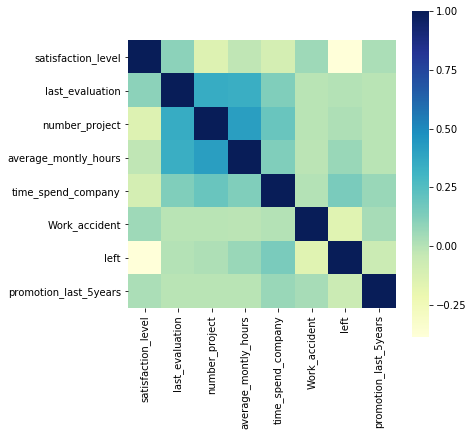

In [25]:
# Draw the heatmap using seaborn
corr = data.corr()
f, ax = plt.subplots(figsize=(6, 6))
sns.heatmap(corr, square=True, cmap="YlGnBu")

In [13]:
corr_left = pd.DataFrame(corr['left'].drop('left'))
corr_left.sort_values(by = 'left', ascending = False)

,left
time_spend_company,0.144822
average_montly_hours,0.071287
number_project,0.023787
last_evaluation,0.006567
sales,-0.043814
promotion_last_5years,-0.061788
Work_accident,-0.154622
salary,-0.157898
satisfaction_level,-0.388375


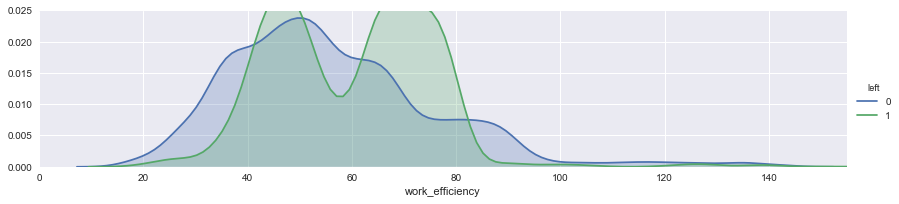

In [84]:
data['work_efficiency'] = (data['average_montly_hours']) /data['number_project']
#regroupCol(data, 'avg_hour_project')
kdeplot(data, 'work_efficiency')

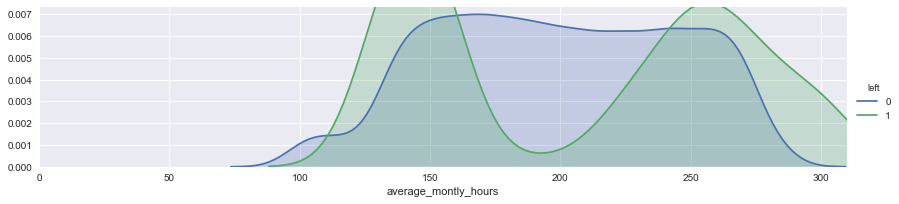

In [85]:
kdeplot(data, 'average_montly_hours')

# About average_montly_hours:
People who left are splited into two groups: with lower average monthly hours and with higher average monthly hours;
People who did not left have relatively constant pattern of average monthly hours.
The reason behind this could be various:

For people who are with less average_montly_hours may don't have enough work to do and then be frustrated; and for those who are with more a-m-h may feel they are over-exploited.

Also we can assume that for the first group, they left because are not hard-working and then have to leave; while for the second one, they left because they are good enough to get a better job.

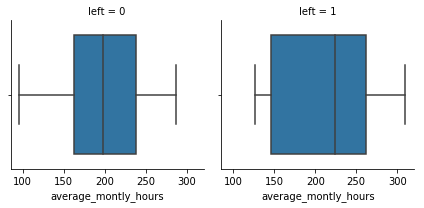

In [21]:
#Boxplot, check outliers
boxplot(data, 'average_montly_hours')


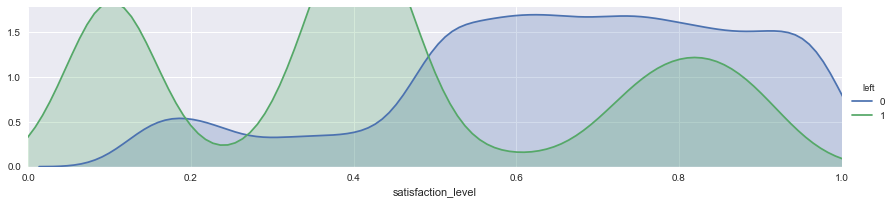

In [88]:
#satisfaction_level
kdeplot(data, 'satisfaction_level')

# About satisfaction_level:
People who left have avragely lower satisfaction level;
People who did not leave are constantly satisfy with their positions;
There's one interesting group: People who left but with relatively high satisfaction level.
The reason why they left could be really interesting:

For those who are not satisfied with their positions (less than 0.5), the reason why they leave could be straightforward to us; While for those who are with higher satisfaction level, the reason for their leaving are not as important as the fact that the company may not be able to keep them stay. We'll talk about this in detail later (combine with other variables).

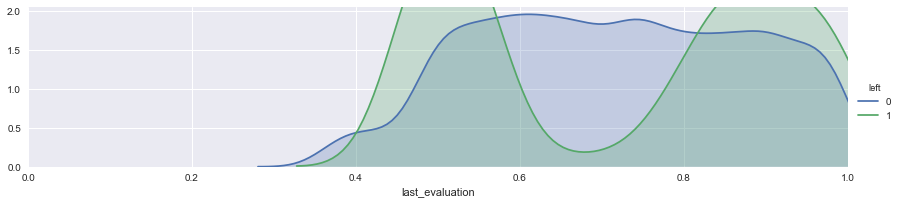

In [89]:
#last_evaluation
kdeplot(data, 'last_evaluation')

# About last_evaluation
For people who left, they are splited into two main groups:

People whose evaluation is relatively low;
People whose last evaluation is very high but still left.
For people who did not leave, they are in a constantly distributed range of last_evaluation.

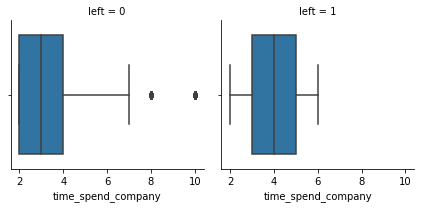

In [23]:
#Boxplot, to see if there are outliers
boxplot(data, 'time_spend_company')

In [31]:
#outliers do exists, drop them off
dropdata = data[data['time_spend_company'] >= 8]
data.drop(dropdata.index, inplace = True)

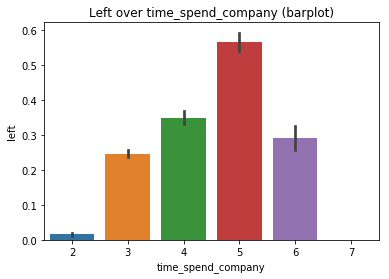

In [36]:
barplot(data, 'time_spend_company')

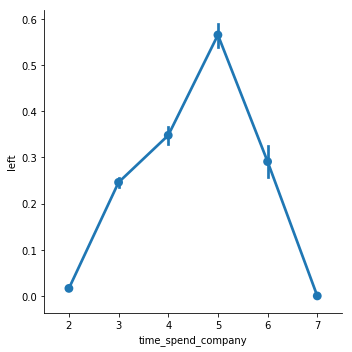

In [45]:
factorplot(data, 'time_spend_company')

# Above plots already do provide much information for us:
For people who spend <= 5 years at a company, the more years they spend, the more likely they leave;
For people who spend > 5 years, the more they spend, the less likely they leave.